In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [89]:
x = torch.ones(1, 256, 16)
xr1 = torch.randn(1, 256, 256)
xr2 = torch.randn(1, 256, 256)
l_q, l_k, l_v, l_c = nn.LazyLinear(1), nn.LazyLinear(1), nn.LazyLinear(16), nn.LazyLinear(1)
attmap = (l_q(x) @ l_k(x).transpose(1, 2)) * xr1
attmap = F.relu(attmap)
detr = torch.sum(attmap, dim=-1, keepdim=True) + torch.sum(F.softplus(l_c(x)), dim=1, keepdim=True) 
score = attmap / detr
print(torch.linalg.matrix_rank((score @ l_v(x)).squeeze()))
print(score @ l_v(x))

tensor([[[ 0.0209, -0.0464, -0.0676,  ...,  0.0859, -0.0366,  0.0191],
         [ 0.0254, -0.0561, -0.0818,  ...,  0.1040, -0.0444,  0.0231],
         [ 0.0232, -0.0514, -0.0750,  ...,  0.0953, -0.0407,  0.0212],
         ...,
         [ 0.0212, -0.0470, -0.0685,  ...,  0.0870, -0.0371,  0.0193],
         [ 0.0216, -0.0478, -0.0696,  ...,  0.0884, -0.0377,  0.0196],
         [ 0.0215, -0.0476, -0.0694,  ...,  0.0881, -0.0376,  0.0196]]],
       grad_fn=<UnsafeViewBackward0>)


In [5]:
def softsign(x):
    return x / (np.abs(x) + 1)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def symsquare(x):
    return np.sqrt(np.abs(x)) * np.sign(x)

In [8]:
def gelu(x):
    coefficient = np.sqrt(2 / np.pi)
    return 0.5 * x * (1 + np.tanh(coefficient * (x + 0.044715 * x**3)))

def gelu2(x):
    return gelu(x) ** 2

In [9]:
def relu(x):
    return np.maximum(x, 0)

In [10]:
def softplus(x):
    return np.log1p(np.exp(x))

def softplus2(x):
    return softplus(x) ** 2

C:\Users\lenha\AppData\Local\Temp\ipykernel_15920\2357360426.py:87: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Gradient magnitude')


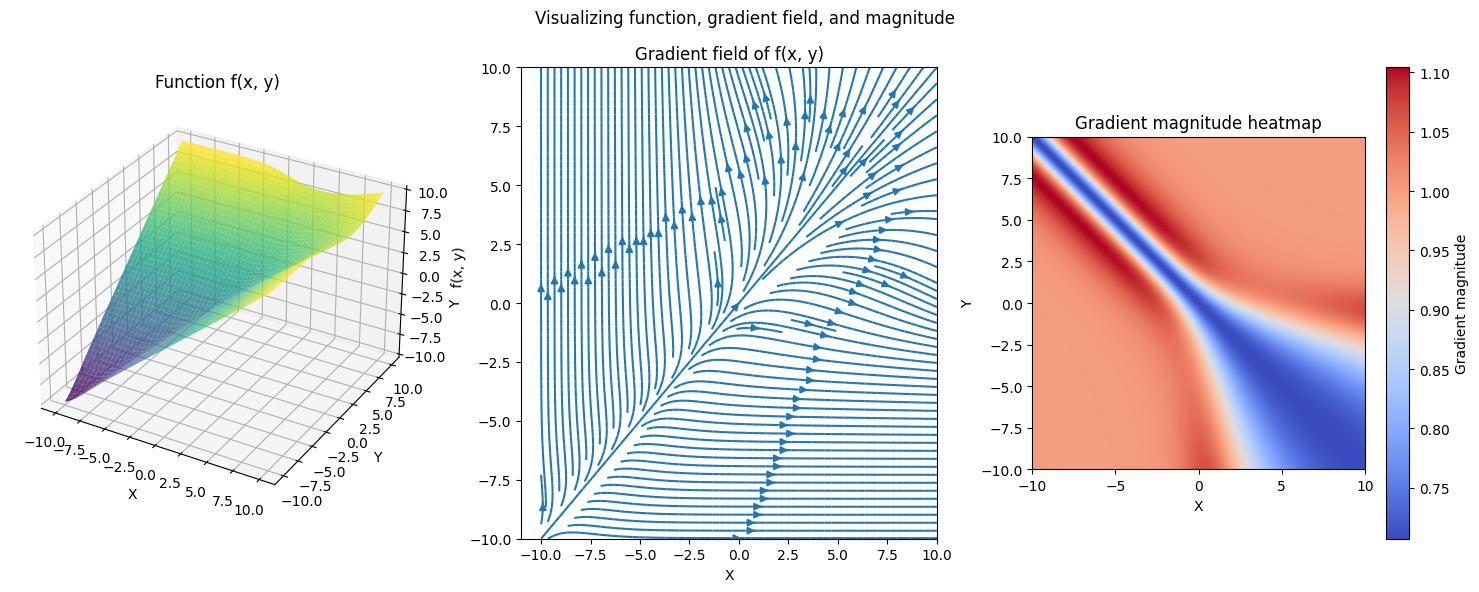

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

alpha = 0.115

# def pattern(x, y):
    # return x * y
    # return softsign(x) * softsign(y)
    # x = softsign(x)
    # y = softsign(y)
    # return np.maximum(x, y)

# def f(x, y):
#     return pattern(x, y) * (np.abs(x) + np.abs(y))

# def o(x, y):
#     mx = np.maximum(x, y)
#     expx = np.exp(x - mx)
#     expy = np.exp(y - mx)
#     return expx / (expx + expy) * x + expy / (expx + expy) * y

def a(x, y):
    mx = np.max(x, y)
    expx = np.exp(x - mx)
    expy = np.exp(y - mx)
    # expx = softplus(x)
    # expy = softplus(y)
    return 2 * expy / (expx + expy) * (0.2 * x + 0.8 * y) + 2 * expx / (expx + expy) * (0.2 * y + 0.8 * x)

# def a(x, y):
#     return x * y

# def f(x, y):
#     return softplus(a(x, y))

def f(x, y):
    return (relu(x) * x) / (relu(x) + relu(y)) + (relu(y) * y) / (relu(x) + relu(y))

# def f(x, y):
#     return sigmoid(x * y)

def df_dxdy(x, y, eps=1e-9):
  return (f(x + eps, y) - f(x, y))/ eps, (f(x, y + eps) - f(x, y))/ eps 

# Define the range of x and y values
x_min, x_max = -10, 10
y_min, y_max = -10, 10

# Create a meshgrid
x, y = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Calculate the function value and gradient
f_xy = f(x, y)
df_dx, df_dy = df_dxdy(x, y)

# Calculate the magnitude of the gradient
grad_magnitude = np.sqrt(df_dx**2 + df_dy**2)

# Plot the surface, gradient field, and magnitude heatmap
fig = plt.figure(figsize=(15, 6))

# Surface plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x, y, f_xy, cmap='viridis', alpha=0.8)
# ax1.quiver(x, y, np.zeros_like(x), df_dx, df_dy, np.zeros_like(x), length=0.05, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Function f(x, y)')

# Gradient field plot
ax2 = fig.add_subplot(132)
ax2.streamplot(x, y, df_dx, df_dy, density=2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Gradient field of f(x, y)')


# Gradient magnitude heatmap with colorbar
ax3 = fig.add_subplot(133)
cmap = 'coolwarm'
norm = plt.Normalize(vmin=np.min(grad_magnitude), vmax=np.max(grad_magnitude))
im = ax3.imshow(grad_magnitude, extent=(x_min, x_max, y_min, y_max), cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Gradient magnitude')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Gradient magnitude heatmap')

# # Surface plot
# ax1 = fig.add_subplot(133, projection='3d')
# ax1.plot_surface(x, y, grad_magnitude, cmap='viridis', alpha=0.8)
# # ax1.quiver(x, y, np.zeros_like(x), df_dx, df_dy, np.zeros_like(x), length=0.05, color='red')
# ax1.set_xlabel('X')
# ax1.set_ylabel('Y')
# ax1.set_zlabel('f(x, y)')
# ax1.set_title('Gradient magnitude')

plt.suptitle('Visualizing function, gradient field, and magnitude')
plt.tight_layout()
plt.show()

In [114]:
x = torch.randn(2)
print(x, nn.functional.normalize(x, dim=-1), nn.functional.softmax(nn.functional.normalize(x, dim=-1) / 0.2, dim=-1))

tensor([-0.1968,  0.2483]) tensor([-0.6212,  0.7837]) tensor([8.8927e-04, 9.9911e-01])


In [93]:
arr = []
it = 1.0
mt = 1.0
dr = 0.999
dr2 = 1.0
inc = False
for i in range(750 * 600):
    arr.append(it)
    if inc == False:
        if it >= 0.05:
            it *= dr
        else:
            inc = True
            mt *= dr2
    else:
        if it <= mt:
            it *= 1 / dr
        else:
            inc = False

In [102]:
arr[1250 * 8]

0.13751914138442445

In [20]:
625 * 37

23125

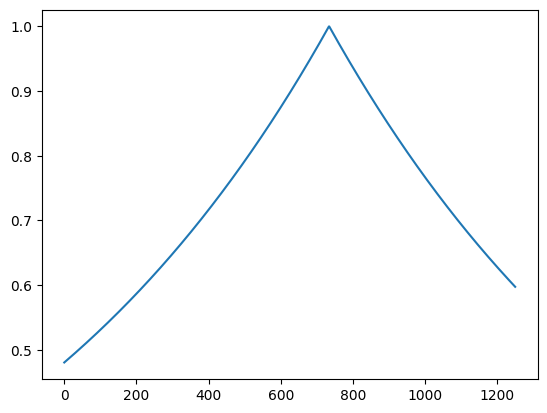

In [105]:
plt.plot(arr[1250 * 9:1250 * 10])

In [27]:
import torch

In [47]:
x = torch.randn(64, 8, 4, 5)
y = torch.randn(64, 8, 7, 5)

In [48]:
import math

In [49]:

def alt_score(x, y):
    _, _, _, d = x.shape
    msd = math.sqrt(d)
    x = torch.sum(x, dim=-1, keepdim=True) / math.sqrt(d)
    y = torch.sum(y, dim=-1, keepdim=True) / math.sqrt(d)
    x_, y_ = torch.unsqueeze(x, 2), torch.unsqueeze(y, 3)
    return torch.minimum(x_, y_)

In [50]:
alt_score(x, y).shape

torch.Size([64, 8, 7, 4, 1])

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x, y):
    return softplus(x) / (softplus(x) + softplus(y))

# Define the grid
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X, Y)

# Create 2D heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z, cmap='coolwarm', shading='auto')
plt.colorbar(label='Z')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Heatmap of the Function f(x, y)')

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'softplus' is not defined

In [407]:
# Authors: Mathieu Blondel, Vlad Niculae
# License: BSD 3 clause

import numpy as np


def _gen_pairs(gen, max_iter, max_inner, random_state, verbose):
    rng = np.random.RandomState(random_state)

    # if tuple, interpret as randn
    if isinstance(gen, tuple):
        shape = gen
        gen = lambda rng: rng.randn(*shape)

    for it in range(max_iter):
        if verbose:
            print("iter", it + 1)

        M1 = gen(rng)
        M2 = gen(rng)

        for t in np.linspace(0.01, 0.99, max_inner):
            M = t * M1 + (1 - t) * M2

            yield M, M1, M2, t


def check_convex(func, gen, max_iter=1000, max_inner=10,
                 quasi=False, random_state=None, eps=1e-9, verbose=0):
    """
    Numerically check whether the definition of a convex function holds for the
    input function.
    If answers "not convex", a counter-example has been found and
    the function is guaranteed to be non-convex. Don't lose time proving its
    convexity!
    If answers "could be convex", you can't completely rule out the possibility
    that the function is non-convex. To be completely sure, this needs to be
    proved analytically.
    This approach was explained by S. Boyd in his convex analysis lectures at
    Stanford.
    Parameters
    ----------
    func:
        Function func(M) to be tested.
    gen: tuple or function
        If tuple, shape of the function argument M. Small arrays are recommended.
        If function, function for generating M.
    max_iter: int
        Max number of trials.
    max_inner: int
        Max number of values between [0, 1] to be tested for the definition of
        convexity.
    quasi: bool (default=False)
        If True, use quasi-convex definition instead of convex.
    random_state: None or int
        Random seed to be used.
    eps: float
        Tolerance.
    verbose: int
        Verbosity level.
    """

    for M, M1, M2, t in _gen_pairs(gen, max_iter, max_inner,
                                   random_state, verbose):
        if quasi:
            # quasi-convex     if f(M)  <= max(f(M1), f(M2))
            # not quasi convex if f(M)  >  max(f(M1), f(M2))
            diff = func(M) - max(func(M1), func(M2))
        else:
            # convex     if f(M)  <= t * f(M1) + (1 - t) * f(M2)
            # non-convex if f(M)  >  t * f(M1) + (1 - t) * f(M2)
            diff = func(M) - (t * func(M1) + (1 - t) * func(M2))

        if diff > eps:
            # We found a counter-example.
            print("not convex (diff=%f)" % diff)
            return

    # To be completely sure, this needs to be proved analytically.
    print("could be convex")

def a(x, y):
    expx = np.exp(x)
    expy = np.exp(y)
    return expx / (expx + expy) * x + expy / (expx + expy) * y 

def softplus(x):
    return np.log(np.exp(x) + 1) 

def sqnorm(x):
    # return softplus(x[0]) / (softplus(x[0]) + softplus(x[1]) + 10)
    return np.minimum(x[0], x[1])

check_convex(sqnorm, gen=(2,), max_iter=10000, max_inner=10,
             random_state=0)

not convex (diff=0.013639)


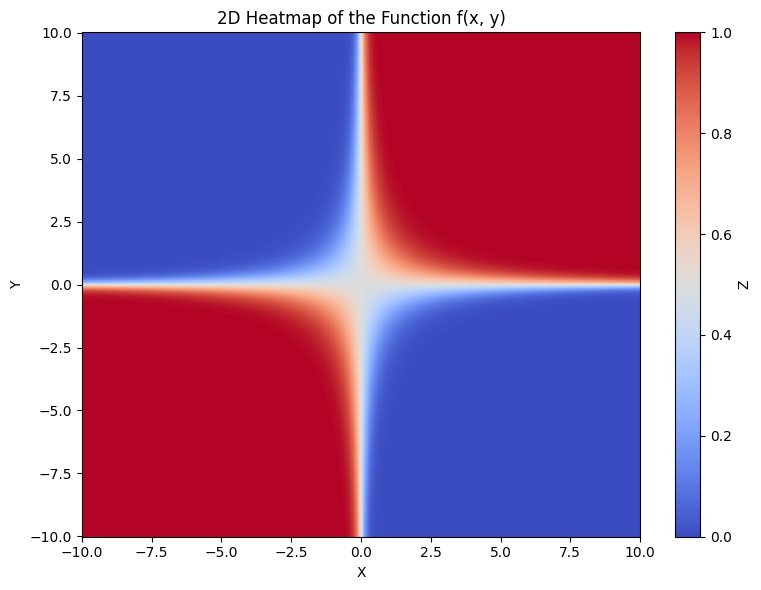

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
alpha = 0.115
beta = 1 / alpha

def f(x, y):
    return sigmoid(x * y)

# def f(x, y):
#     return x * y

# Define the grid
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X, Y)

# Create 2D heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z, cmap='coolwarm', shading='auto')
plt.colorbar(label='Z')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Heatmap of the Function f(x, y)')

# Show the plot
plt.tight_layout()
plt.show()

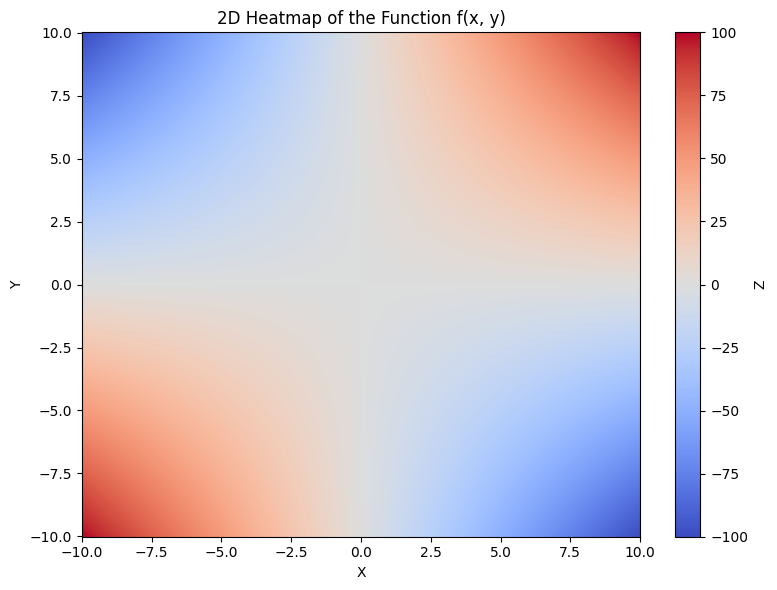

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x, y):
    return x*y

# Define the grid
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X, Y)

# Create 2D heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z, cmap='coolwarm', shading='auto')
plt.colorbar(label='Z')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Heatmap of the Function f(x, y)')

# Show the plot
plt.tight_layout()
plt.show()

In [1]:
import torch

In [9]:
from knn_cuda import KNN

In [12]:
x = torch.randn(1, 4, 32).cuda()

In [8]:
def get_neighbors(point, idx):
    new_indices = torch.cat([idx.reshape(idx.shape[0], idx.shape[1] * idx.shape[2], 1) for _ in range(point.shape[2])], dim=-1)
    ret = torch.gather(point, dim=1, index=new_indices)
    return ret.reshape(point.shape[0], point.shape[1], idx.shape[2], point.shape[2])

In [14]:
_, idx = KNN(k=2, transpose_mode=True)(x, x)

In [18]:
x

tensor([[[ 8.8374e-01, -9.9930e-01,  9.0865e-02, -4.6895e-01,  6.5062e-01,
           3.5713e-01,  2.7540e-03, -1.1006e+00, -3.2654e-01,  7.0072e-02,
           1.4537e+00,  6.3529e-01, -8.7891e-01,  9.0447e-01,  1.5200e+00,
          -3.4485e-01,  7.9845e-01,  4.2235e-01,  8.7704e-01, -1.0676e+00,
           4.4966e-01, -1.0209e-01,  7.2012e-01,  3.3927e-01, -1.8600e+00,
          -1.3683e+00, -9.9775e-01, -2.3663e+00, -3.5763e-01,  3.9668e-01,
           7.5651e-01, -7.1849e-01],
         [-1.1850e+00, -9.1746e-02, -4.6457e-01,  1.9257e-01,  9.7715e-01,
          -1.0291e+00,  7.1886e-01,  1.2051e-01, -1.0491e+00, -7.5297e-02,
           4.2818e-01, -2.2365e+00,  1.7874e+00,  9.5576e-01,  8.2599e-01,
           9.7171e-01,  4.0681e-01, -4.4097e-01,  6.4391e-01,  1.7685e-01,
           1.0861e+00,  1.2479e+00, -3.4845e-01, -1.9240e-01, -4.2436e-01,
           2.6441e-01,  4.8439e-01, -1.3958e+00,  2.2066e-01,  2.4104e+00,
          -2.0359e-01, -8.0374e-01],
         [-1.6264e+00, -9.

In [19]:
idx

tensor([[[0, 1],
         [1, 0],
         [2, 0],
         [3, 1]]], device='cuda:0')

In [17]:
get_neighbors(x, idx)[0][0]

tensor([[ 0.8837, -0.9993,  0.0909, -0.4690,  0.6506,  0.3571,  0.0028, -1.1006,
         -0.3265,  0.0701,  1.4537,  0.6353, -0.8789,  0.9045,  1.5200, -0.3449,
          0.7984,  0.4224,  0.8770, -1.0676,  0.4497, -0.1021,  0.7201,  0.3393,
         -1.8600, -1.3683, -0.9978, -2.3663, -0.3576,  0.3967,  0.7565, -0.7185],
        [-1.1850, -0.0917, -0.4646,  0.1926,  0.9771, -1.0291,  0.7189,  0.1205,
         -1.0491, -0.0753,  0.4282, -2.2365,  1.7874,  0.9558,  0.8260,  0.9717,
          0.4068, -0.4410,  0.6439,  0.1769,  1.0861,  1.2479, -0.3485, -0.1924,
         -0.4244,  0.2644,  0.4844, -1.3958,  0.2207,  2.4104, -0.2036, -0.8037]],
       device='cuda:0')

In [2]:
import torch.nn.functional as F
import torch

In [16]:
x = torch.randn(64, 10000)

torch.return_types.max(
values=tensor([0.7160, 0.9998, 1.0000, 0.6374, 0.9970, 0.7687, 0.9998, 0.9971, 1.0000,
        0.9876, 0.9992, 0.8272, 0.7215, 0.8264, 0.8420, 0.5164, 0.8814, 0.9993,
        0.5886, 0.8941, 0.9931, 0.9870, 0.9508, 0.9959, 0.9126, 1.0000, 0.5231,
        0.8466, 0.9978, 0.9969, 0.5063, 0.8530, 0.9997, 0.8903, 0.9390, 0.9531,
        0.9848, 0.5336, 0.8533, 0.9815, 0.9880, 0.9758, 0.7654, 0.9929, 0.7210,
        0.5496, 0.8334, 0.4723, 0.9357, 0.9995, 1.0000, 0.9865, 0.5164, 0.4289,
        0.4246, 1.0000, 0.6112, 0.9909, 0.6974, 0.9894, 0.9998, 0.9972, 0.9986,
        0.5682]),
indices=tensor([2730, 7199, 4072, 8893, 3585, 1765, 2842, 7550, 6802, 4776, 2904, 3241,
        9526,  590,  714, 4330, 4714, 1692, 9809,  682, 5814,  792, 4549, 4066,
        1610, 6583,  740, 1842, 7993, 4391, 8083, 5919, 2040, 4410,   16, 6559,
         487, 6829, 7905, 6976, 8163, 4079, 9967, 8916, 6579, 3822, 8877, 7115,
         746, 1910, 5701, 6338, 3473,  683, 2433, 1785, 7127, 8

In [146]:
x = F.gumbel_softmax(x, dim=1, tau=0.5)
x1, x2 = torch.max(x, dim=1)
print(x1)
torch.sort(x2)

tensor([0.4136, 0.6688, 0.9336, 0.3473, 0.9190, 0.8760, 0.7531, 0.3916, 0.8959,
        0.3535, 0.9771, 0.6801, 1.0000, 0.5844, 0.9400, 0.7433, 0.4366, 0.9830,
        0.5234, 0.9456, 0.4150, 0.8543, 0.6694, 0.5670, 0.9437, 0.3281, 0.4574,
        0.6432, 0.4554, 0.8649, 0.3430, 0.2980, 0.5080, 0.8543, 0.1970, 0.2909,
        0.8494, 0.3850, 0.9034, 0.8966, 0.7751, 0.5793, 0.4873, 0.7701, 0.4253,
        0.3502, 0.5631, 0.2923, 0.5381, 0.2277, 0.4167, 0.9325, 0.8125, 0.1687,
        0.9848, 0.9392, 0.6506, 0.9668, 0.6647, 0.2652, 0.5843, 0.6079, 0.7331,
        0.4064])


torch.return_types.sort(
values=tensor([  44,   52,  276,  362,  562,  656,  795,  897, 1242, 1655, 1677, 1791,
        2050, 2104, 2152, 2243, 2349, 2454, 2472, 2666, 2704, 2746, 2849, 2926,
        3153, 3158, 3190, 3657, 3770, 3785, 3815, 4096, 4396, 4427, 4449, 4530,
        4619, 4677, 5095, 5473, 5616, 5671, 5795, 5837, 5905, 6091, 6390, 6479,
        6764, 6815, 6924, 7151, 7318, 7826, 7972, 8464, 8716, 9085, 9512, 9667,
        9803, 9855, 9983, 9991]),
indices=tensor([43, 29, 51, 44, 59, 56,  4, 57, 10,  8, 35, 33,  3, 16, 37, 49, 54, 20,
        39, 22, 60, 34, 32, 19, 47, 14, 24, 11,  0, 62, 17, 12, 25, 55,  7, 26,
        53, 31,  6, 15, 36, 46,  2, 50, 38, 63, 48, 18, 21, 41, 13,  9,  1, 23,
        42, 61, 52, 27, 58, 30,  5, 28, 45, 40]))

In [1]:
import pickle
import numpy as np

In [2]:
file = open('.\\data\\LRA\\listops.test.pickle', 'rb')
x = pickle.load(file)

In [4]:
x[0]['input_ids_0'].shape

(2048,)

In [3]:
x

[{'input_ids_0': array([1, 3, 3, ..., 0, 0, 0]), 'label': 8},
 {'input_ids_0': array([1, 7, 7, ..., 0, 0, 0]), 'label': 9},
 {'input_ids_0': array([10, 10,  6, ...,  0,  0,  0]), 'label': 5},
 {'input_ids_0': array([10, 12, 14, ...,  0,  0,  0]), 'label': 6},
 {'input_ids_0': array([10,  5,  6, ...,  0,  0,  0]), 'label': 3},
 {'input_ids_0': array([10, 12,  2, ...,  0,  0,  0]), 'label': 5},
 {'input_ids_0': array([15,  1, 12, ...,  0,  0,  0]), 'label': 7},
 {'input_ids_0': array([15,  1,  2, ...,  0,  0,  0]), 'label': 6},
 {'input_ids_0': array([10,  1, 14, ...,  0,  0,  0]), 'label': 6},
 {'input_ids_0': array([1, 7, 2, ..., 0, 0, 0]), 'label': 9},
 {'input_ids_0': array([15,  7, 13, ...,  0,  0,  0]), 'label': 0},
 {'input_ids_0': array([10,  2,  2, ...,  0,  0,  0]), 'label': 5},
 {'input_ids_0': array([10,  7,  5, ...,  0,  0,  0]), 'label': 7},
 {'input_ids_0': array([ 1,  2, 15, ...,  0,  0,  0]), 'label': 8},
 {'input_ids_0': array([10,  1,  7, ...,  0,  0,  0]), 'label': 9}

In [62]:
from torch.distributions import Dirichlet

x = Dirichlet(torch.tensor([1/3, 1/3, 1/3]))

In [66]:
r = x.sample_n(64 * 3).reshape(64, 1, 3, 3)

c:\Users\lenha\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\distributions\distribution.py:179: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn(


In [79]:
k = torch.randn(64, 128, 3).unsqueeze(2)

In [80]:
k.shape

torch.Size([64, 128, 1, 3])

In [81]:
(k @ r).shape

torch.Size([64, 128, 1, 3])

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import pickle

class PathFinderDataset(Dataset):
    def __init__(self, split):
        path = '.\\data\\LRA\\pathfinder32-curv_contour_length_14.' + split + '.pickle'
        self.data = pickle.load(open(path, 'rb'))

    def to_onehot(self, x):
        return F.one_hot(torch.tensor(x).to(torch.long), num_classes=256)

    def _get_item(self, index):
        dpoint = self.data[index]
        x, y = dpoint['input_ids_0'], dpoint['label']
        x = self.to_onehot(x)
        return x, y
    
    def __getitem__(self, index):
        return self._get_item(index)
    
    def __len__(self):
        return len(self.data)

In [49]:
ds = PathFinderDataset('test')

In [54]:
set(ds.data[2]['input_ids_0'])

{0,
 1,
 2,
 3,
 4,
 5,
 8,
 11,
 18,
 20,
 24,
 25,
 26,
 27,
 34,
 36,
 42,
 55,
 59,
 64,
 74,
 76,
 80,
 85,
 97,
 101,
 102,
 109,
 111,
 117,
 119,
 122,
 123,
 124,
 129,
 135,
 137,
 145,
 148,
 155,
 157,
 159,
 163,
 171,
 172,
 180,
 182,
 206,
 228,
 245,
 255}

In [45]:
file = open('.\\data\\LRA\\pathfinder32-curv_baseline.test.pickle', 'rb')
x = pickle.load(file)

In [28]:
file = open('.\\data\\LRA\\text.test.pickle', 'rb')
x = pickle.load(file)

In [29]:
print(list(x[0]['input_ids_0']))

[85, 105, 102, 115, 102, 33, 98, 115, 102, 33, 103, 106, 109, 110, 116, 33, 117, 105, 98, 117, 33, 110, 98, 108, 102, 33, 100, 98, 115, 102, 102, 115, 116, 47, 33, 71, 112, 115, 33, 72, 102, 112, 115, 104, 102, 33, 83, 112, 110, 102, 115, 112, 45, 33, 106, 117, 33, 120, 98, 116, 33, 79, 74, 72, 73, 85, 33, 80, 71, 33, 85, 73, 70, 33, 77, 74, 87, 74, 79, 72, 33, 69, 70, 66, 69, 60, 33, 103, 112, 115, 33, 76, 102, 119, 106, 111, 33, 84, 110, 106, 117, 105, 45, 33, 68, 77, 70, 83, 76, 84, 60, 33, 103, 112, 115, 33, 83, 112, 99, 102, 115, 117, 33, 83, 112, 101, 115, 106, 104, 118, 102, 123, 45, 33, 70, 77, 33, 78, 66, 83, 74, 66, 68, 73, 74, 47, 33, 66, 101, 101, 33, 117, 112, 33, 117, 105, 98, 117, 33, 109, 106, 116, 117, 33, 80, 111, 118, 115, 33, 85, 118, 108, 102, 109, 40, 116, 33, 98, 99, 116, 112, 109, 118, 117, 102, 109, 122, 33, 98, 110, 98, 123, 106, 111, 104, 33, 69, 74, 79, 72, 46, 66, 46, 77, 74, 79, 72, 46, 77, 70, 84, 84, 47, 33, 71, 109, 98, 120, 109, 102, 116, 116, 33, 103,

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

class RetrievalDataset(Dataset):
    def __init__(self, split):
        path = '.\\data\\LRA\\retrieval.' + split + '.pickle'
        self.data = pickle.load(open(path, 'rb'))

    def to_onehot(self, x):
        return F.one_hot(torch.tensor(x).to(torch.long), num_classes=128)

    def _get_item(self, index):
        dpoint = self.data[index]
        x1, x2, y = dpoint['input_ids_0'], dpoint['input_ids_1'], dpoint['label']
        x1, x2 = self.to_onehot(x1), self.to_onehot(x2)
        return x1, x2, y
    
    def __getitem__(self, index):
        return self._get_item(index)
    
    def __len__(self):
        return len(self.data)

In [15]:
ds = RetrievalDataset('test')

In [17]:
a, b, c = ds[0]
x, y, z = ds[1]

In [27]:
torch.abs(a - b)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [24]:
torch.sum(torch.abs(a - b))

tensor(7518)

In [27]:
torch.tensor(x[0]['input_ids_0']).to(torch.long).shape

torch.Size([4096])

In [28]:


F.one_hot(torch.tensor(x[0]['input_ids_0']).to(torch.long), num_classes=128)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])

In [43]:
len(x)

25000

In [47]:
max([max(set(x[i]['input_ids_0'])) for i in range(len(x))])

127

In [40]:
max([x[i]['label'] for i in range(400)])

1

In [38]:
x[0]

{'input_ids_0': array([ 85, 105, 102, ...,   0,   0,   0]), 'label': 1}

In [17]:
import torch
import torch.nn.functional as F
import math

In [39]:
x = torch.randn(1, 4, 3)
y = torch.randn(1, 5, 3)

In [29]:
x, y

(tensor([[[ 0.1068, -0.2357, -0.6001],
          [-0.6700,  1.1799, -0.7543],
          [ 0.0726,  0.3124, -1.5548],
          [ 2.4445,  0.3021,  1.2962]]]),
 tensor([[[ 0.1068, -0.2357, -0.6001],
          [-0.6700,  1.1799, -0.7543],
          [ 0.0726,  0.3124, -1.5548],
          [ 2.4445,  0.3021,  1.2962]]]))

In [40]:
x_, y_ = torch.unsqueeze(x, 1), torch.unsqueeze(y, 2)
torch.sum(F.softsign(x_) * F.softsign(y_) * (torch.abs(x_) + torch.abs(y_)) / 2.0, dim=-1)

tensor([[[-0.5816,  0.3150,  0.6227,  0.0604],
         [-0.3340,  0.1803,  0.5336,  0.1620],
         [ 0.1313,  0.2114, -0.5966,  0.7749],
         [-0.1892,  0.5217, -1.0221,  0.5815],
         [-0.2252,  0.1183, -0.1037, -0.0957]]])

In [36]:
def symsqrt(x):
    return torch.sqrt(torch.abs(x)) * torch.sign(x)

In [41]:
x @ y.transpose(-1, -2) / math.sqrt(3)

tensor([[[-1.3386, -0.7350,  0.3507, -0.5036, -0.4692],
         [ 0.7162,  0.4066,  0.5262,  1.2286,  0.2817],
         [ 1.4199,  1.1902, -1.2327, -2.4613, -0.1643],
         [ 0.1115,  0.3435,  1.8287,  1.4714, -0.2437]]])

In [ ]:
x.unsqueeze(1)
y.unsqueeze(2)

In [35]:
F.softsign(x) @ F.softsign(y).transpose(-1, -2) * (torch.norm(x, dim=-1).unsqueeze(1) / math.sqrt(3.0) + torch.norm(y, dim=-1).unsqueeze(2) / math.sqrt(3.0))

tensor([[[ 0.1406,  0.0246,  0.2450, -0.3720],
         [ 0.0246,  1.1451,  0.6587, -1.0059],
         [ 0.2450,  0.6587,  0.7912, -0.6063],
         [-0.3720, -1.0059, -0.6063,  2.8158]]])

In [90]:
(F.softsign(x) * torch.abs(x)) @ F.softsign(y).transpose(-1, -2) + (F.softsign(y) * torch.abs(y)) @ F.softsign(x).transpose(-1, -2)

tensor([[[-1.0349, -0.7773,  0.0205,  0.1372],
         [-0.6123, -0.1606, -0.6223, -0.5032],
         [-0.1551, -0.3549,  1.0294, -0.4943],
         [ 0.0407, -0.5674, -0.0419,  0.3093]]])

In [77]:
x

tensor([[[ 0.0637, -0.4375, -0.9811],
         [-0.8908,  0.0733, -1.5516],
         [ 0.4150,  1.1773,  0.1535],
         [-0.2251, -0.4387,  0.4951]]])

In [78]:
y

tensor([[[-0.4166,  0.7356,  1.7793],
         [-0.9080, -0.3750,  0.6886],
         [ 0.4245,  1.5889,  0.6051],
         [ 1.3481, -1.0705,  0.9645]]])

In [81]:
x.shape

torch.Size([1, 4, 3])

In [82]:
F.softsign(x) @ F.softsign(y).transpose(-1, -2)

tensor([[[-0.4636, -0.1475, -0.3556, -0.0514],
         [-0.2218, -0.0424, -0.3277, -0.6044],
         [ 0.2281, -0.2328,  0.4694, -0.0458],
         [ 0.1368,  0.3056, -0.1171,  0.2148]]])

In [83]:
F.softsign(x) * torch.abs(x)

tensor([[[ 0.0038, -0.1332, -0.4858],
         [-0.4197,  0.0050, -0.9435],
         [ 0.1217,  0.6366,  0.0204],
         [-0.0414, -0.1338,  0.1640]]])

In [2]:
from layer import RESC
import torch.nn as nn
import time

In [ ]:
layer1 = RESC(256, 8, 256, 256, 0.1, False, 2048, 0.1, 'composite')

c:\Users\lenha\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
layer2 = nn.TransformerEncoderLayer(256, 8, 2048, 0.1, batch_first=True)

In [3]:
import torch

In [21]:
x = torch.randn(1, 4096)

In [22]:
torch.max(nn.functional.softmax(x / 0.05, dim=-1))

tensor(0.7364)

In [ ]:
for ns in [512, 1024, 2048, 4096, 8192]:
    input = torch.randn(64, ns, 256)

    start_time_l1 = time.time()
    layer1(input)
    end_time_l1 = time.time()

    start_time_l2 = time.time()
    layer2(input)
    end_time_l2 = time.time()
    
    print(ns, end_time_l1 - start_time_l1, end_time_l2 - start_time_l2)

512 2.7506418228149414 2.2055771350860596
1024 4.807212829589844 6.51119589805603
